In [1]:
import pandas as pd

# Load the dataset
file_path = 'exchange_rate.csv'
exchange_rate_df = pd.read_csv(file_path, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M'))

# Display the first few rows of the dataframe
exchange_rate_df.head()

<ipython-input-1-2425fe7564a1>:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  exchange_rate_df = pd.read_csv(file_path, parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M'))


,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


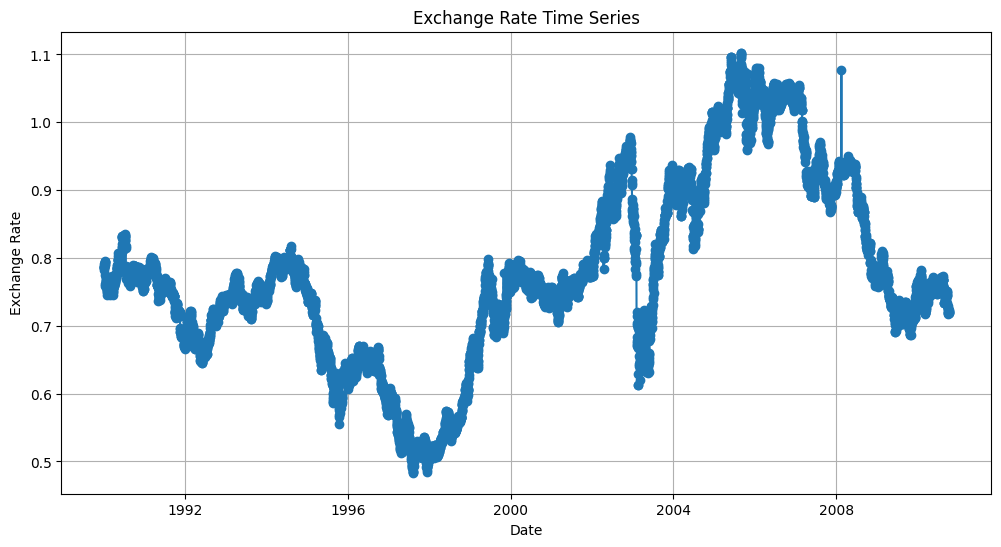

In [2]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df['date'], exchange_rate_df['Ex_rate'], marker='o', linestyle='-')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

In [3]:
# Ensure 'date' is set as the index
exchange_rate_df.set_index('date', inplace=True)

# Ensure the 'Ex_rate' column is numeric
exchange_rate_df['Ex_rate'] = pd.to_numeric(exchange_rate_df['Ex_rate'], errors='coerce')

# Drop any rows with missing or non-numeric 'Ex_rate' values
exchange_rate_df.dropna(subset=['Ex_rate'], inplace=True)


In [4]:
exchange_rate_df.isnull().sum()

Ex_rate    0
dtype: int64

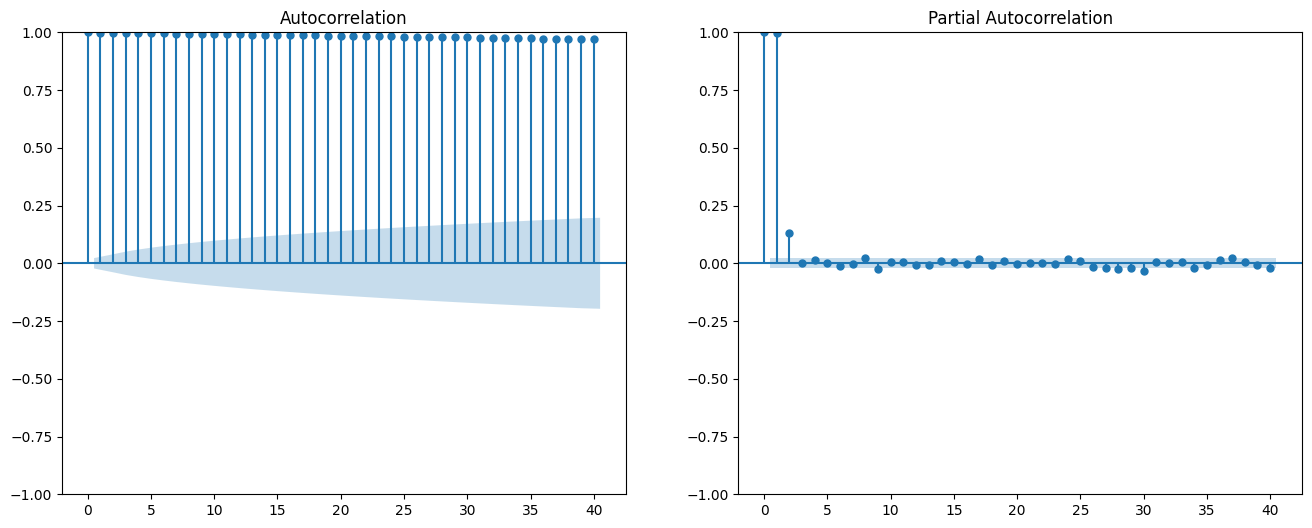

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'exchange_rate_df' is your dataframe and 'Ex_rate' is the column of interest

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(exchange_rate_df['Ex_rate'], lags=40, ax=axes[0])
plot_pacf(exchange_rate_df['Ex_rate'], lags=40, ax=axes[1])
plt.show()

In [6]:
# Perform ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(exchange_rate_df['Ex_rate'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If p-value > 0.05, difference the series and re-check
exchange_rate_df['Ex_rate_diff'] = exchange_rate_df['Ex_rate'].diff().dropna()
adf_result_diff = adfuller(exchange_rate_df['Ex_rate_diff'].dropna())
print(f'ADF Statistic after differencing: {adf_result_diff[0]}')
print(f'p-value after differencing: {adf_result_diff[1]}')

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
ADF Statistic after differencing: -99.39343120118632
p-value after differencing: 0.0


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
p = 1  # Replace with estimated p
d = 1  # Replace with estimated d
q = 1  # Replace with estimated q
model = ARIMA(exchange_rate_df['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 05 Jul 2024   AIC                         -56102.322
Time:                        06:43:23   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

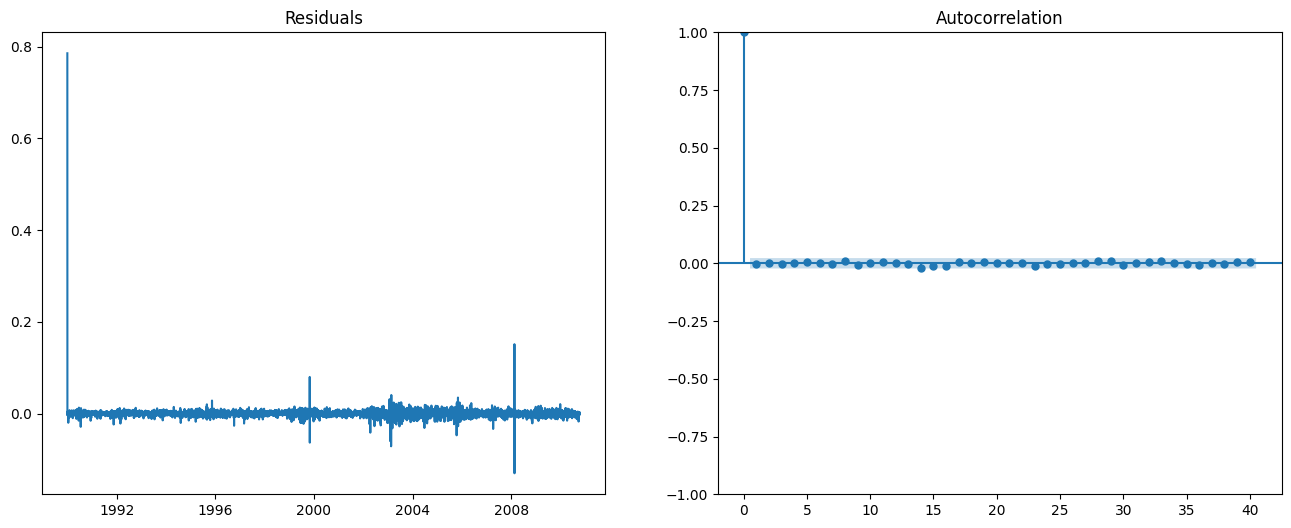

In [8]:
# Plot residuals
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(residuals)
ax[0].set_title('Residuals')
plot_acf(residuals, lags=40, ax=ax[1])
plt.show()

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [10]:
# Split the dataset into training and test sets (e.g., last 12 months for testing)
train, test = exchange_rate_df[:-12], exchange_rate_df[-12:]


In [11]:
# Fit the ARIMA model on the training set
p, d, q = 1, 1, 1  # Replace with your selected (p, d, q) parameters
model = ARIMA(train['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
# Forecast the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast_index = test.index

In [13]:
# Calculate the mean squared error
mse = mean_squared_error(test['Ex_rate'], forecast)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 2.6637365224524037e-05


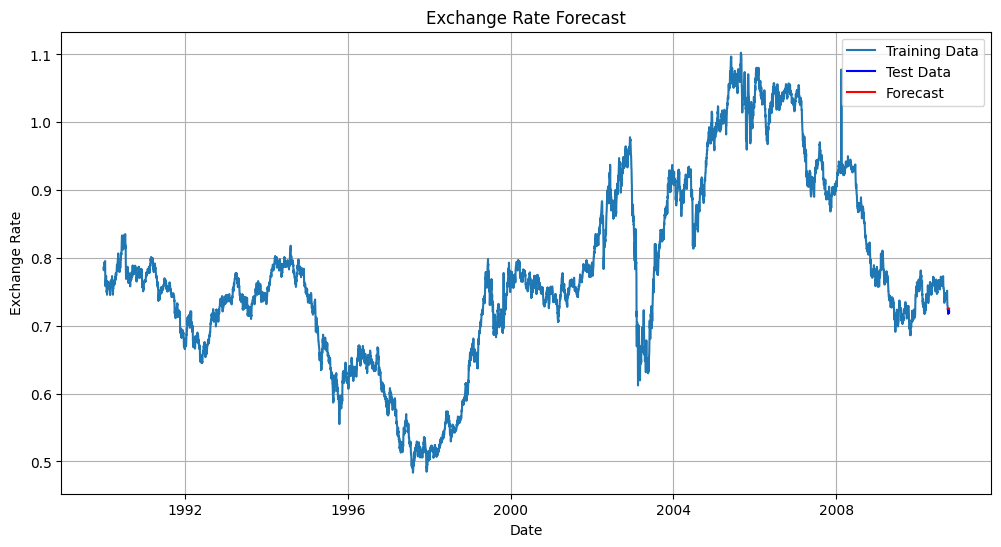

In [14]:
# Plot the actual values and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Training Data')
plt.plot(test.index, test['Ex_rate'], label='Test Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

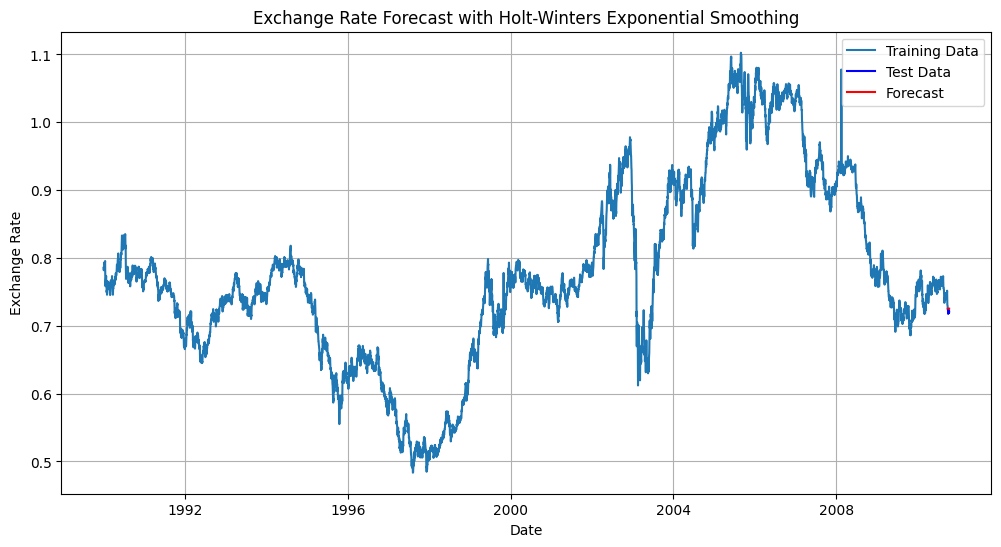

In [18]:
# Plot the actual values and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Training Data')
plt.plot(test.index, test['Ex_rate'], label='Test Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Exchange Rate Forecast with Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [23]:
# ARIMA Model
p, d, q = 1, 1, 1
model_arima = ARIMA(train['Ex_rate'], order=(p, d, q))
model_fit_arima = model_arima.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
# Exponential Smoothing Model
model_es = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_fit_es = model_es.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [25]:
# Forecast the next 12 periods
arima_forecast = model_fit_arima.forecast(steps=12)
es_forecast = model_fit_es.forecast(steps=12)

In [26]:
# Calculate error metrics for ARIMA
arima_mae = mean_absolute_error(test['Ex_rate'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test['Ex_rate'], arima_forecast))
arima_mape = mean_absolute_percentage_error(test['Ex_rate'], arima_forecast)

In [27]:
# Calculate error metrics for Exponential Smoothing
es_mae = mean_absolute_error(test['Ex_rate'], es_forecast)
es_rmse = np.sqrt(mean_squared_error(test['Ex_rate'], es_forecast))
es_mape = mean_absolute_percentage_error(test['Ex_rate'], es_forecast)

In [28]:
print("Summary of Error Metrics")
print("========================")
print("ARIMA Model:")
print(f"MAE: {arima_mae}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape}%")

print("\nExponential Smoothing Model:")
print(f"MAE: {es_mae}")
print(f"RMSE: {es_rmse}")
print(f"MAPE: {es_mape}%")


Summary of Error Metrics
ARIMA Model:
MAE: 0.004773268641174814
RMSE: 0.005161139915224547
MAPE: 0.663278176387259%

Exponential Smoothing Model:
MAE: 0.0045473710330293515
RMSE: 0.004916781502294575
MAPE: 0.6318868331108421%


In [29]:
# Determine the better model based on error metrics
if arima_rmse < es_rmse:
    print("\nThe ARIMA model yielded a better performance based on RMSE.")
else:
    print("\nThe Exponential Smoothing model yielded a better performance based on RMSE.")


The Exponential Smoothing model yielded a better performance based on RMSE.


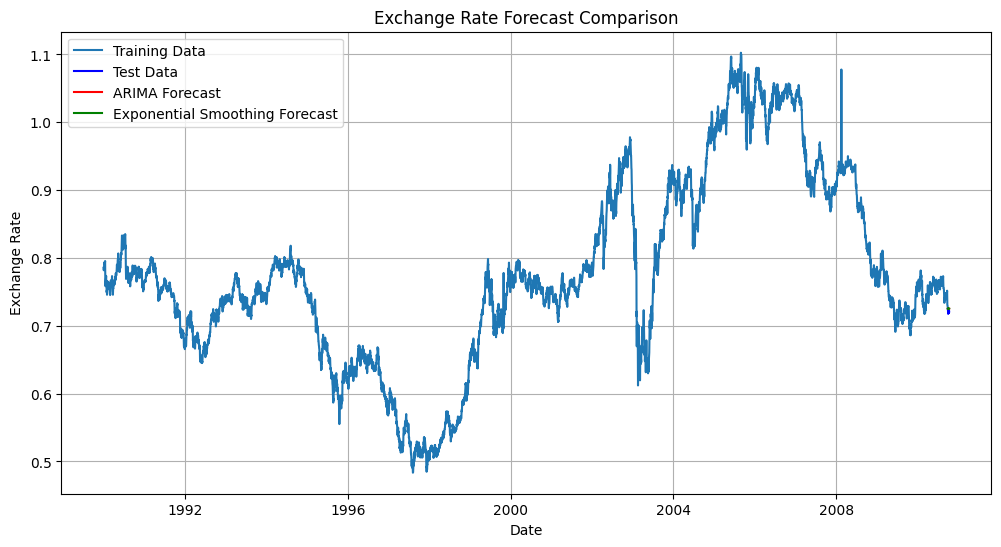

In [30]:
# Plot the actual values and the forecasted values for both models
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Ex_rate'], label='Training Data')
plt.plot(test.index, test['Ex_rate'], label='Test Data', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exchange Rate Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()